In [ ]:
%load_ext autoreload
%autoreload 2

import torch
from PIL import Image, ImageDraw


import sys
sys.path.append('..')

from kandinsky3 import  get_inpainting_pipeline
from kandinsky3.utils import prepare_mask

In [2]:
device = torch.device('cuda:1')

In [ ]:
inp_pipe = get_inpainting_pipeline(device, fp16=True)

### Inpainting

In [29]:
import numpy as np

w, h = 768, 768
shape = [(200, 100), (500, 700)] 
  
# creating new Image object 
mask_image = Image.new("L", (w, h)) 
  
# create rectangle image 
img1 = ImageDraw.Draw(mask_image)   
img1.rectangle(shape, fill ="#ffffff")

mask = prepare_mask(mask_image)

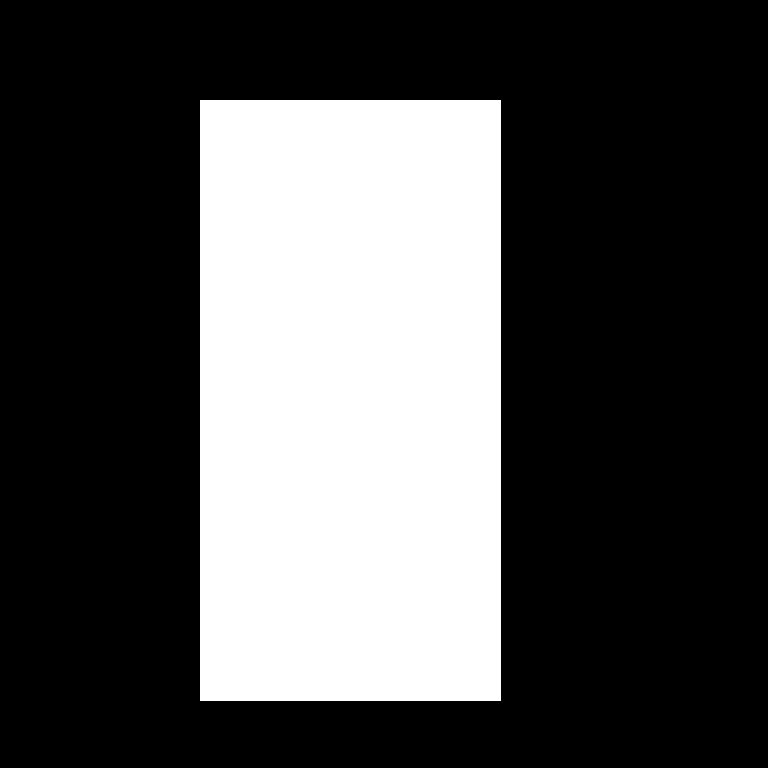

In [30]:
mask_image

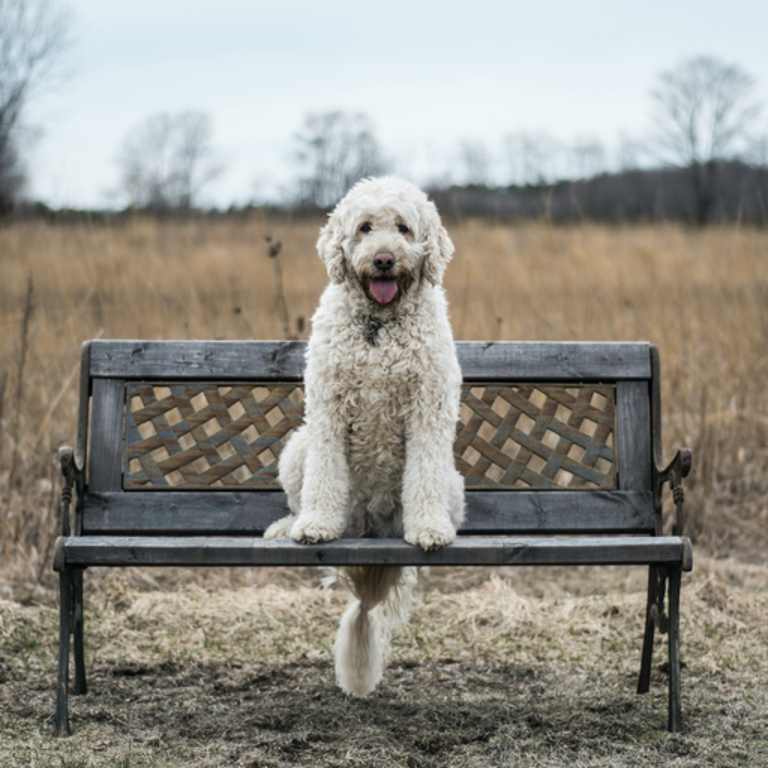

In [31]:
import requests
from io import BytesIO

def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"

image = download_image(img_url).resize((768, 768))
image

In [42]:
res = inp_pipe("cheburashka sitting on a bench", image, mask)

100%|██████████| 50/50 [00:04<00:00, 10.40it/s]


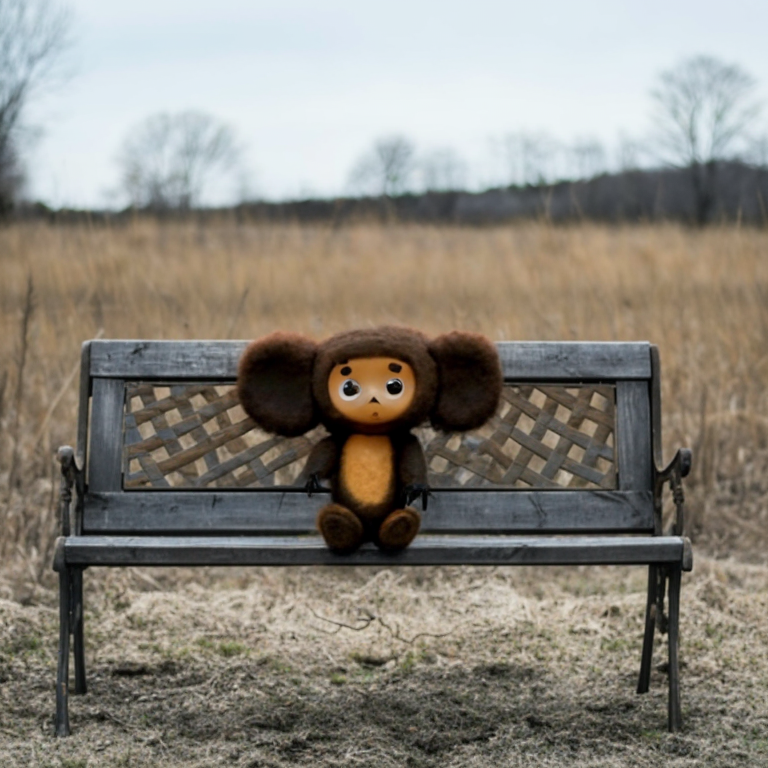

In [43]:
res[0]